In [162]:
import requests
import re
import pandas as pd
from urllib.parse import quote
from datetime import datetime
import matplotlib.pyplot as plt

In [182]:
#Importartion of major events date during covid accros countries
data = pd.read_csv('data/interventions.csv')
data

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [164]:
# Define a user agent string
user_agent = 'MandarineCorp (clementine.naim@epfl.ch)'

# Specify the headers with the user agent
headers = {
    'User-Agent': user_agent,
    'accept': 'application/json'
}


In [165]:
#SUMMARY OF THE PAGE 

# URL for the Wikimedia REST API to get information about a page
url = f'https://en.wikipedia.org/api/rest_v1/page/summary/absurdism'

# Making a GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content
    data = response.json()
    print(f"Title: {data['title']}")
    print(f"Description: {data['description']}")
    print(f"Extract: {data['extract']}")
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")
    print(response.text)

Title: Absurdism
Description: Theory that life in general is meaningless
Extract: Absurdism is the philosophical theory that the universe is irrational and meaningless. It states that trying to find meaning leads people into a conflict with the world. This conflict can be between rational man and an irrational universe, between intention and outcome, or between subjective assessment and objective worth, but the precise definition of the term is disputed. Absurdism claims that the world as a whole is absurd. It differs in this regard from the less global thesis that some particular situations, persons, or phases in life are absurd.


In [166]:
#PAGEVIEW TEST FOR ONE
page_title= 'Absolute (philosophy)'

url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page_title}/daily/2020031500/2020041500'


# Making a GET request
response_views = requests.get(url,headers=headers)

# Check if the request was successful (status code 200)
if response_views.status_code == 200:
    # Print the response content
    data = response_views.json()
else: 
    # Print an error message if the request was unsuccessful
    print(f"Error: {response_views.status_code}")
    print(page_title)

# Extract the 'items' list from the data
items_list = data['items']
# Create a DataFrame
df = pd.DataFrame(items_list)

In [167]:
#GET THE LIST OF PHILOSOPHIES PAGES from page list of philo (but only 5 languages)

# Specify the API endpoint URL
api_url = "https://en.wikipedia.org/w/api.php"

# Specify the parameters for the API request
params = {
    'action': 'query',
    'prop': 'revisions',
    'titles': 'List_of_philosophies',
    'rvslots': '*',
    'rvprop': 'content',
    'formatversion': 2,
    'format': 'json'
}

# Make the API request
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the content of the first revision
    revisions = data['query']['pages'][0]['revisions']
    
    if revisions:
        content = revisions[0]['slots']['main']['content']
        
        # Use a regular expression to find section titles
        section_titles = re.findall(r'\[\[([^|\]]+)(?:\|[^]]+)?\]\]', content)
        
        while section_titles[0][0]!='A' or section_titles[-1][0]!='Z':
            if section_titles[0][0]!='A':
                section_titles.pop(0)
            if section_titles[-1][0]!='Z':
                section_titles.pop(-1)

        # Display the list of section titles
        #print("List of Section Titles:")
    else:
        print("No revision content found.")
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")
    #print(response.text)


In [183]:
# Specify the API endpoint URL
api_url = "https://en.wikipedia.org/w/api.php"

df_lang = pd.DataFrame() 
# Specify the page name
page_name = ['Absurdism','Stoicism']

# Specify the languages you want to retrieve language links for
target_languages = ['fr', 'ja', 'de', 'it','da','nl','no','sr','sv','ko','ca','fi']  # Add or remove language codes as needed


# Initialize a dictionary to store language links
language_links = []

for page in page_name : 
# Make separate requests for each language
    for lang in target_languages:
        params = {
            'action': 'query',
            'titles': page,
            'prop': 'langlinks',
            'llprop': 'url',
            'format': 'json',
            'lllang': lang,
        }

        # Make the API request
        response = requests.get(api_url, params=params)
        data = response.json()

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Extract language links from the API response
            pages = data['query']['pages']
            page_id = next(iter(pages))
            langlinks = pages[page_id].get('langlinks', [])
            #print(langlinks)
            # Store language links in the dictionary
            #language_links[lang] = langlinks
            for link in langlinks:
                language_links.append( link['url'])
            #language_links.append(
        else:
            # Print an error message if the request was unsuccessful
            print(f"Error for language {lang}: {response.status_code}")
            print(response.text)

In [169]:
#finds the country code from a given link, used in  get_page_views_by_languages(links)
def find_country_code_and_title(link):
    state=0
    code=""
    title=""
    for i in range(len(link)):
        if state==2 and link[i]==".":
            state+=1
        if state==2:
            code+=link[i]
        if state==5:
            title+=link[i]
        if link[i]=="/":
            state+=1
    return code,title

In [170]:
def get_page_views_by_languages(links):
    philo_views=pd.DataFrame()
    subject="fuck"
    for link in links:
        # Define a user agent to have acces to the API 
        user_agent = 'MandarineCorp (clementine.naim@epfl.ch)'
        # Specify the headers with the user agent
        headers = {
            'User-Agent': user_agent,
            'accept': 'application/json'
        
        }
        # Find country code:
        code, title = find_country_code_and_title(link)
        
        if code=="fr":
            subject=title
        url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{code}.wikipedia.org/all-access/all-agents/{title}/monthly/2018010100/2023010100'
        # Making a GET request
        response_views = requests.get(url,headers=headers)

        # Check if the request was successful (status code 200)
        if response_views.status_code == 200:
            # Print the response content
            data = response_views.json()
        else:
            # Print an error message if the request was unsuccessful
            print(f"Error: {response_views.status_code}")
            print(page_title)


        # Extract the 'items' list from the data
        items_list = data['items']
        # Create a DataFrame
        df = pd.DataFrame(items_list)
        df["subject"]=subject
        philo_views = pd.concat([philo_views,df])
    return philo_views

In [171]:
philo_views_en=pd.DataFrame()

#PAGEVIEWS 
for page_title in section_titles: 
    # URL for the Wikimedia Pagecounts API to get the number of views for a page
    url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page_title}/monthly/2018010100/2023010100'

    # Define a user agent to have acces to the API 
    user_agent = 'MandarineCorp (clementine.naim@epfl.ch)'

    # Specify the headers with the user agent
    headers = {
        'User-Agent': user_agent,
        'accept': 'application/json'
    }

    # Making a GET request
    response_views = requests.get(url,headers=headers)

    # Check if the request was successful (status code 200)
    if response_views.status_code == 200:
        # Print the response content
        data = response_views.json()
    else:
        # Print an error message if the request was unsuccessful
        print(f"Error: {response_views.status_code}")
        print(page_title)


    # Extract the 'items' list from the data
    items_list = data['items']

    # Create a DataFrame
    df = pd.DataFrame(items_list)
    philo_views_en = pd.concat([philo_views_en,df])

Error: 404
Nonduality (spirituality)


In [172]:
df = pd.DataFrame(items_list)
philo_views_en = pd.concat([philo_views_en,df])

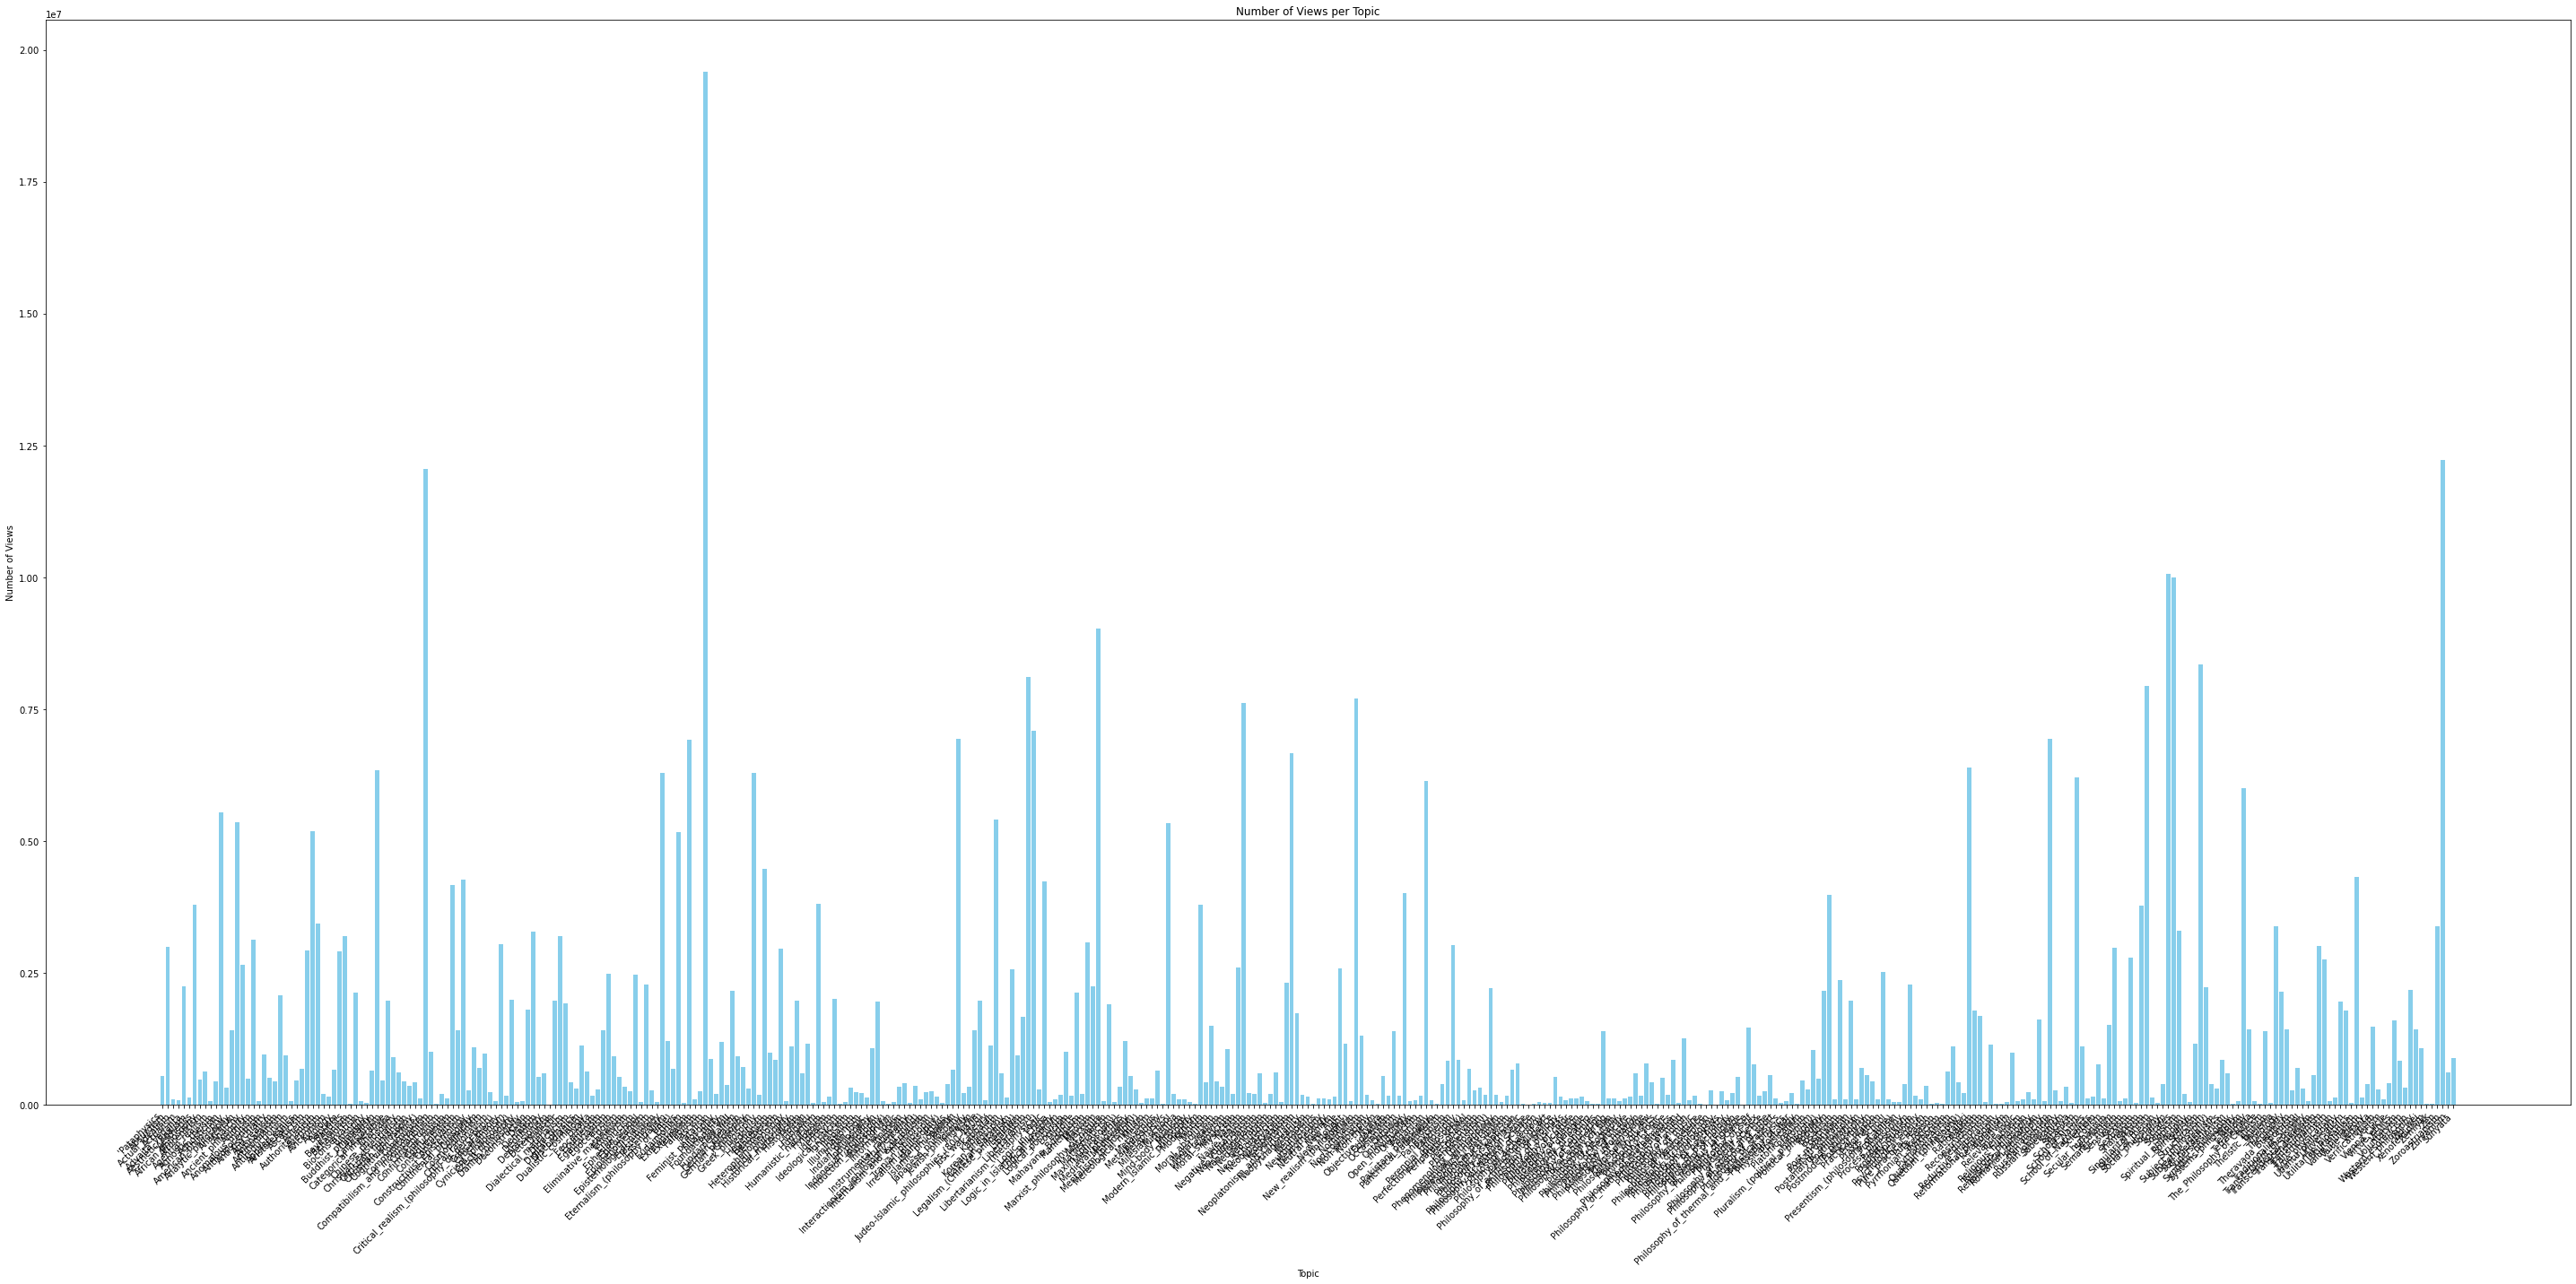

In [173]:
#Get the total number of views per topic
total_views_per_topic = philo_views_en.groupby('article')['views'].sum().reset_index()

#Plot an histogram of the total number of views per topic in order to see the distribution
plt.figure(figsize=(40, 20))
plt.bar(total_views_per_topic['article'], total_views_per_topic['views'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Views')
plt.title('Number of Views per Topic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

In [174]:
#More accurate way to classifiy philosophies...to be completed 

philosophies = [
    # List all the philosophies you provided
    'Absolute (philosophy)', 'Absurdism', 'Tychism', 'Acosmism', 'Aestheticism', 'Agnostic atheism', 'Agnostic theism', 'Agnosticism', 'Altruism', 'Anarchism', # ... (remaining philosophies)
]

# Define the class hierarchy using dictionaries
classifications = {
    'Ontological and Metaphysical Orientations': {
        'Metaphysical Theories': [
            'Absolute (philosophy)', 'Acosmism', 'Idealism', 'Materialism', 'Monism and Dualism'
        ],
        'Ontological Views': [
            'Pantheism', 'Realism and Nominalism', 'Substance Dualism'
        ]
    },
    'Epistemological Frameworks': {
        'Approaches to Knowledge': [
            'Empiricism', 'Rationalism', 'Skepticism'
        ],
        'Epistemological Theories': [
            'Constructivist Epistemology', 'Pragmatism', 'Reliabilism'
        ]
    },
    'Ethical and Moral Philosophies': {
    'Ethical Theories': [
        'Absolutism and Relativism', 'Deontological Ethics', 'Utilitarianism'
    ],
    'Moral Views': [
        'Altruism', 'Egoism', 'Moral Realism'
    ]
    },
    
}

# Function to find the class/subclass for a philosophy
def find_classification(philosophy):
    for classification, subclasses in classifications.items():
        for subclass, philosophies in subclasses.items():
            if philosophy in philosophies:
                return classification, subclass
    return "Not Classified", "Not Classified"

# Loop through all philosophies and print their classifications
#for philosophy in philosophies:
#    classification, subclass = find_classification(philosophy)
#    print(f"{philosophy} -> Class: {classification}, Subclass: {subclass}")


In [175]:
#Construct broaders philosophy topics 
#Create the new lists
metaphysics_and_ontology = ['Absolute (philosophy)', 'Acosmism', 'Animism', 'Atomism', 'Dualism (Mind-body dualism, Substance dualism)',
                            'Emergent materialism', 'Immaterialism', 'Monism', 'Pantheism']

existentialism_and_absurdism = ['Absurdism', 'Existentialism']# Je pense a split en 2 

epistemology = ['Agnosticism', 'Empiricism', 'Rationalism']

ethics_and_moral_philosophy = ['Altruism', 'Antinatalism', 'Consequentialism', 'Ethical egoism', 'Hedonism', 'Moral absolutism',
                               'Moral realism', 'Moral relativism', 'Moral universalism', 'Utilitarianism']

political_and_social_philosophy = ['Anarchism', 'Authoritarianism', 'Capitalism', 'Communism', 'Libertarianism', 'Socialism', 'Totalitarianism']

philosophy_of_mind = ['Behaviorism', 'Dualism (Mind-body dualism, Substance dualism)', 'Functionalism (philosophy of mind)',
                      'Idealism', 'Materialism', 'Phenomenalism', 'Physicalism', 'Solipsism']

religious_and_theological_philosophy = ['Deism', 'Monotheism', 'Polytheism', 'Religious humanism', 'Theism']

philosophy_of_time = ['Eternalism (philosophy of time)']

philosophy_of_science = ['Empiricism', 'Positivism', 'Scientism']

cultural_and_social_philosophy = ['Aestheticism', 'Anthropocentrism', 'Anthropomorphism', 'Cultural relativism', 'Environmentalism',
                                  'Feminism', 'Humanism', 'Secular humanism']


In [176]:
# Create the new DataFrame with columns for each topic
broader_philosophy_topics = pd.DataFrame(index=philo_views_en['timestamp'].unique())

# Filter and aggregate views for each philosophy topic
topics = {
    'metaphysics_and_ontology': metaphysics_and_ontology,
    'existentialism_and_absurdism': existentialism_and_absurdism,
    'epistemology': epistemology,
    'ethics_and_moral_philosophy': ethics_and_moral_philosophy,
    'political_and_social_philosophy': political_and_social_philosophy,
    'philosophy_of_mind': philosophy_of_mind,
    'religious_and_theological_philosophy': religious_and_theological_philosophy,
    'philosophy_of_time': philosophy_of_time,
    'philosophy_of_science': philosophy_of_science,
    'cultural_and_social_philosophy': cultural_and_social_philosophy
}

for topic, articles in topics.items():
    topic_views = philo_views_en[philo_views_en['article'].isin(articles)]
    topic_views = topic_views.groupby('timestamp')['views'].sum()
    broader_philosophy_topics[topic] = topic_views

# Now, broader_philosophy_topics contains aggregated views for each philosophy topic in one DataFrame

#Drop last month of data because not complete
    if broader_philosophy_topics.index[-1] == '2023010100' :
        broader_philosophy_topics.drop(broader_philosophy_topics.index[-1], inplace=True)

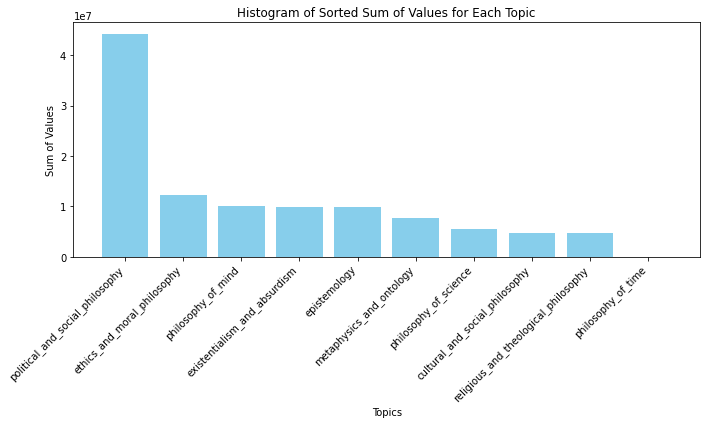

In [177]:
# Sum up all rows for each column
row_sums = broader_philosophy_topics.sum(axis=0)

# Create a DataFrame with topics and corresponding row sums
sum_df = pd.DataFrame({'Topic': broader_philosophy_topics.columns, 'Sum': row_sums})

# Sort the DataFrame by the row sums
sorted_sum_df = sum_df.sort_values(by='Sum', ascending=False)

# Plotting the histogram of sorted sum values
plt.figure(figsize=(10, 6))
plt.bar(sorted_sum_df['Topic'], sorted_sum_df['Sum'], color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Sum of Values')
plt.title('Histogram of Sorted Sum of Values for Each Topic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

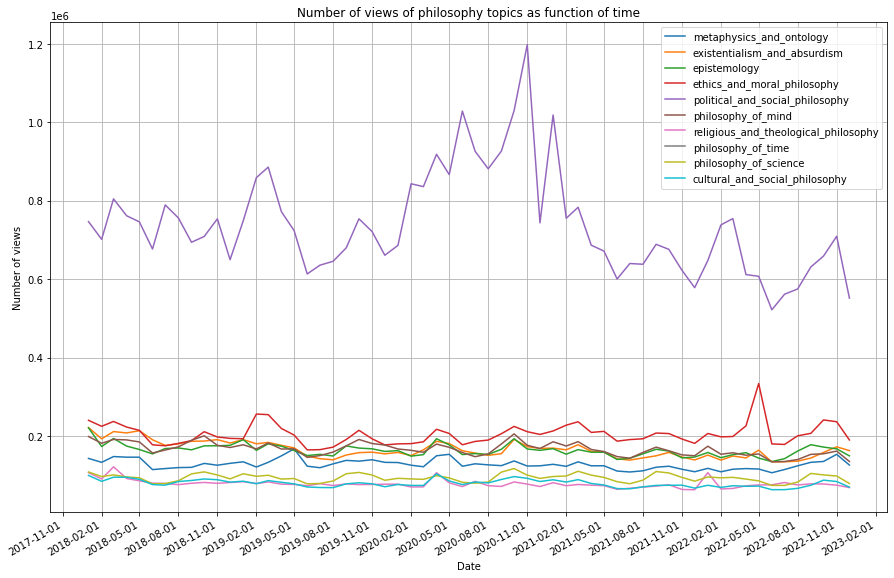

In [178]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 10))

broader_philosophy_topics.index = pd.to_datetime(broader_philosophy_topics.index, format='%Y%m%d%H')

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics.columns:
    ax.plot(broader_philosophy_topics.index, broader_philosophy_topics[column], label=column)


ax.set(xlabel='Date', ylabel='Number of views',
       title='Number of views of philosophy topics as function of time')
ax.grid()
ax.legend()
fig.autofmt_xdate()

# Display date once every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set interval to 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

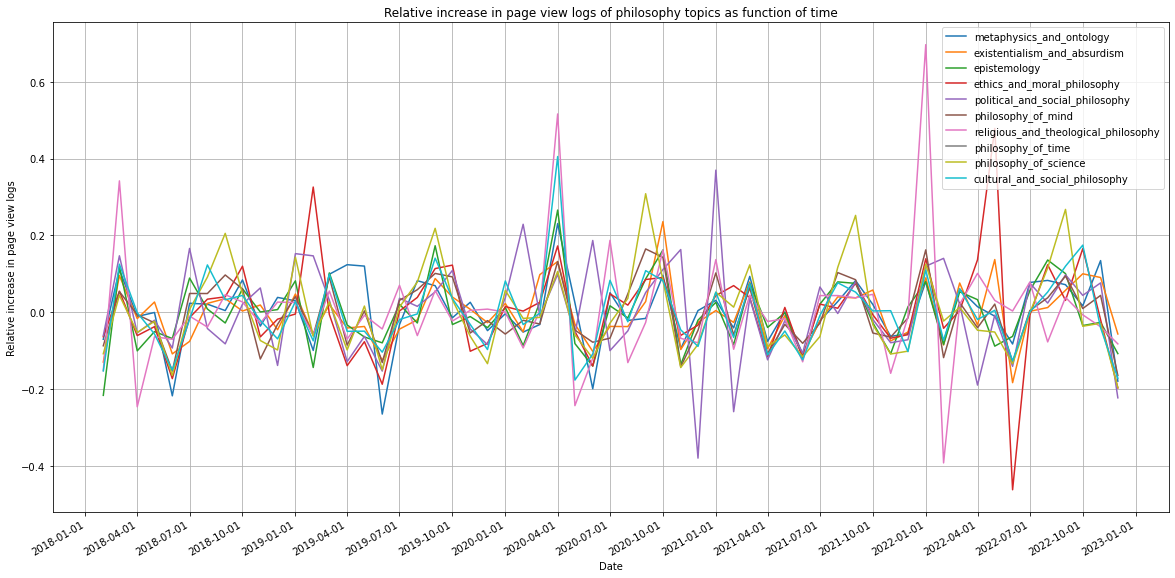

In [179]:
#For each broader philosophy plot the relative increase in page view logs
# Create an empty DataFrame to store the relative increase in page view logs
broader_philosophy_topics_relative = pd.DataFrame()

# Add relative increase in page view logs columns for each philosophy topic to the broader dataset, use for loop 
for column in broader_philosophy_topics.columns:
    broader_philosophy_topics_relative[column] = broader_philosophy_topics[column].pct_change()

#plot
fig, ax = plt.subplots(figsize=(20, 10))

broader_philosophy_topics_relative.index = pd.to_datetime(broader_philosophy_topics_relative.index, format='%Y%m%d%H')

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics_relative.columns:
    ax.plot(broader_philosophy_topics_relative.index, broader_philosophy_topics_relative[column], label=column)

ax.set(xlabel='Date', ylabel='Relative increase in page view logs',
 title='Relative increase in page view logs of philosophy topics as function of time')
ax.grid()
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()



In [180]:
#Starting from february 2020 to july 2022, compute histogram of relative increases in page view logs for each broader philosophy topic


# Finding how many visits there is per subject in the different languages relatively to each other

In [181]:
df=get_page_views_by_languages(language_links).sort_values(['subject','project','timestamp

SyntaxError: EOL while scanning string literal (<ipython-input-181-e1913ae43fec>, line 1)

In [ ]:
#finding total visits over 5 years:
dfsum=df.groupby(['article','project']).sum('views')
dfsum.head(500)
